<a href="https://colab.research.google.com/github/ayuksekdag/pyspark_learning/blob/main/pyspark1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP 

In [14]:
#step 1 check if everything is there
!ls

In [ ]:
# step 2: download spark engine
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
# step 3 download crimes files
!wget "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=%3B"
# rename file
!mv "rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=;" reported-crimes.csv


In [13]:
!ls

reported-crimes.csv  spark-2.3.1-bin-hadoop2.7
sample_data	     spark-2.3.1-bin-hadoop2.7.tgz


In [20]:
# step 4 set the environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

# step 5 check if spark is there
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate() 
print(sc)

#step 6 check if pyspark is there 
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
print(spark)


<SparkContext master=local[*] appName=pyspark-shell>


In [55]:
from pyspark.sql.functions import to_timestamp, col, lit
 
df = spark.read.options( \
                        delimiter=';' \
                        ,header='True' \
                        ,dateFormat = "yyyy-MM-dd HH:mm:ss a" \
                        ,inferSchema = "True"
                        ,nullValue = 'null' \
                        ) \
                        .csv('reported-crimes.csv') 
# df = spark.read.csv('reported-crimes.csv',header=True)
df.show(5)



+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|   

In [56]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



#START YOUR CODE 

In [65]:
df.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



add a column with a constant

In [66]:
df.withColumn('newcol',lit('solved')).show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|newcol|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| fa

add a Filter 

In [68]:
df.filter(col('Primary Type')=='BATTERY').show(5)

+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|   

unique rows

In [70]:
df.select(col('Primary Type')).distinct().show(3)

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
+--------------------+
only showing top 3 rows



sorting 

In [74]:
df.orderBy(col('Date'),ascending=False).show(3)

+--------+-----------+--------------------+------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|             Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12581002|   JE493516|12/31/2021 12:55:...| 020XX W NORTH AVE|0460|           BATTERY|              SIMPLE|       BAR OR TAVERN| false| 

In [ ]:
group by

In [75]:
df.groupby('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  53324|
|CRIMINAL SEXUAL A...|   4751|
|            STALKING|   4286|
|PUBLIC PEACE VIOL...|  51498|
|           OBSCENITY|    763|
|NON-CRIMINAL (SUB...|      9|
|               ARSON|  12773|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14608|
|   CRIMINAL TRESPASS| 209566|
|             ASSAULT| 484623|
|      NON - CRIMINAL|     38|
|LIQUOR LAW VIOLATION|  14671|
| MOTOR VEHICLE THEFT| 348270|
|               THEFT|1582553|
|             BATTERY|1378891|
|             ROBBERY| 282626|
|            HOMICIDE|  11801|
|           RITUALISM|     24|
|    PUBLIC INDECENCY|    188|
+--------------------+-------+
only showing top 20 rows



In [81]:
mydf = df.groupby('Primary Type').count()
mydf

DataFrame[Primary Type: string, count: bigint]

                         Primary Type    count
0          OFFENSE INVOLVING CHILDREN    53324
1             CRIMINAL SEXUAL ASSAULT     4751
2                            STALKING     4286
3              PUBLIC PEACE VIOLATION    51498
4                           OBSCENITY      763
5    NON-CRIMINAL (SUBJECT SPECIFIED)        9
6                               ARSON    12773
7                   DOMESTIC VIOLENCE        1
8                            GAMBLING    14608
9                   CRIMINAL TRESPASS   209566
10                            ASSAULT   484623
11                     NON - CRIMINAL       38
12               LIQUOR LAW VIOLATION    14671
13                MOTOR VEHICLE THEFT   348270
14                              THEFT  1582553
15                            BATTERY  1378891
16                            ROBBERY   282626
17                           HOMICIDE    11801
18                          RITUALISM       24
19                   PUBLIC INDECENCY      188
20           

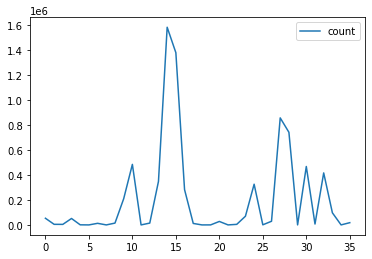

In [87]:
mypd = df.groupby('Primary Type').count()

pandasDF = mypd.toPandas()
print(pandasDF)

pandasDF.plot()
